In [ ]:
import pandas as pd
df=pd.read_csv(r"/content/laptop_price.csv")
print(df.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

In [ ]:
# Check the first few rows
print(df.head())

# Get basic information about the dataset
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

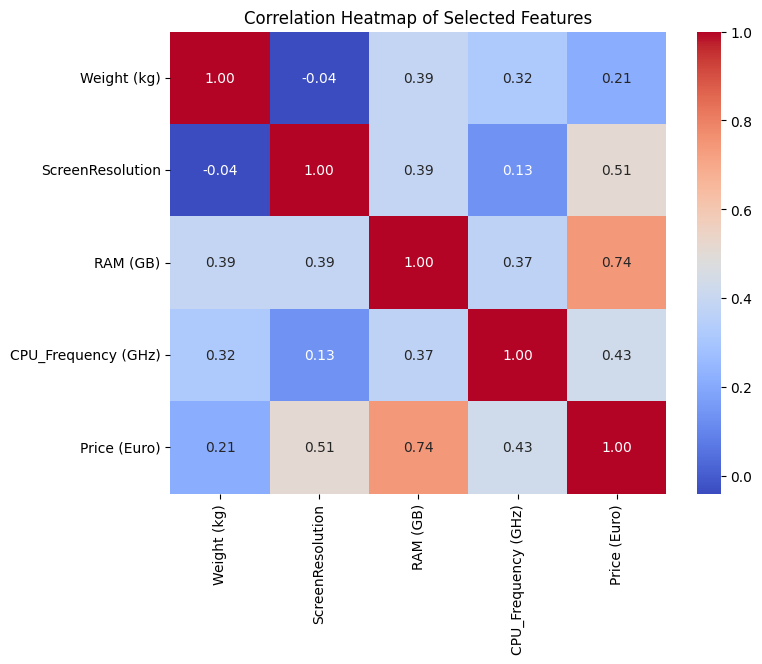

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'laptop_price.csv'  # Replace with the correct path to your file
df = pd.read_csv(file_path)

# Derive 'ScreenResolution' and 'Memory_Size' features if needed
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(float).prod(axis=1)  # Pixel count approximation
df['Memory_Size (GB)'] = df['Memory'].str.extract(r'(\d+)').astype(int)  # Extract memory size in GB

# Selecting relevant features
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)", "Price (Euro)"]
df_selected = df[selected_features]

# Correlation matrix
correlation_matrix = df_selected.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


In [ ]:

import pandas as pd

# Load the dataset
file_path = 'laptop_price.csv'  # Replace with the correct path to your file
df = pd.read_csv(file_path)

# Derive 'ScreenResolution' and 'Memory_Size' features if needed
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(float).prod(axis=1)  # Pixel count approximation
df['Memory_Size (GB)'] = df['Memory'].str.extract(r'(\d+)').astype(int)  # Extract memory size in GB

# Selecting relevant numerical features
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)", "Price (Euro)"]
df_selected = df[selected_features]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print("Correlation Matrix (Numerical):")
print(correlation_matrix)


Correlation Matrix (Numerical):
                     Weight (kg)  ScreenResolution  RAM (GB)  \
Weight (kg)             1.000000         -0.040126  0.389370   
ScreenResolution       -0.040126          1.000000  0.388002   
RAM (GB)                0.389370          0.388002  1.000000   
CPU_Frequency (GHz)     0.318649          0.130565  0.366254   
Price (Euro)            0.211883          0.511753  0.740287   

                     CPU_Frequency (GHz)  Price (Euro)  
Weight (kg)                     0.318649      0.211883  
ScreenResolution                0.130565      0.511753  
RAM (GB)                        0.366254      0.740287  
CPU_Frequency (GHz)             1.000000      0.428847  
Price (Euro)                    0.428847      1.000000  


Pair Plot:


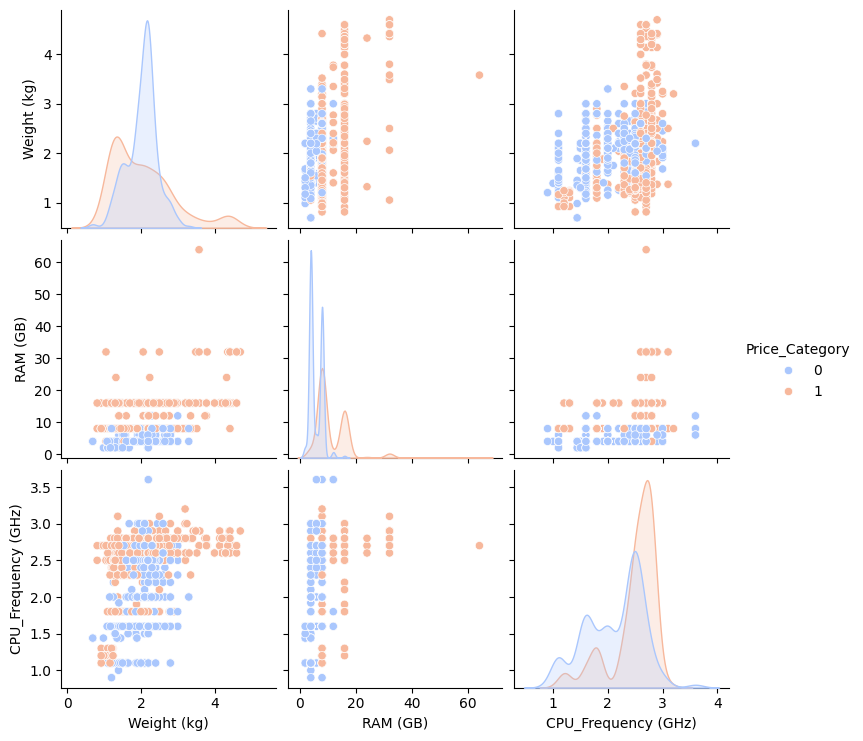

Histograms:


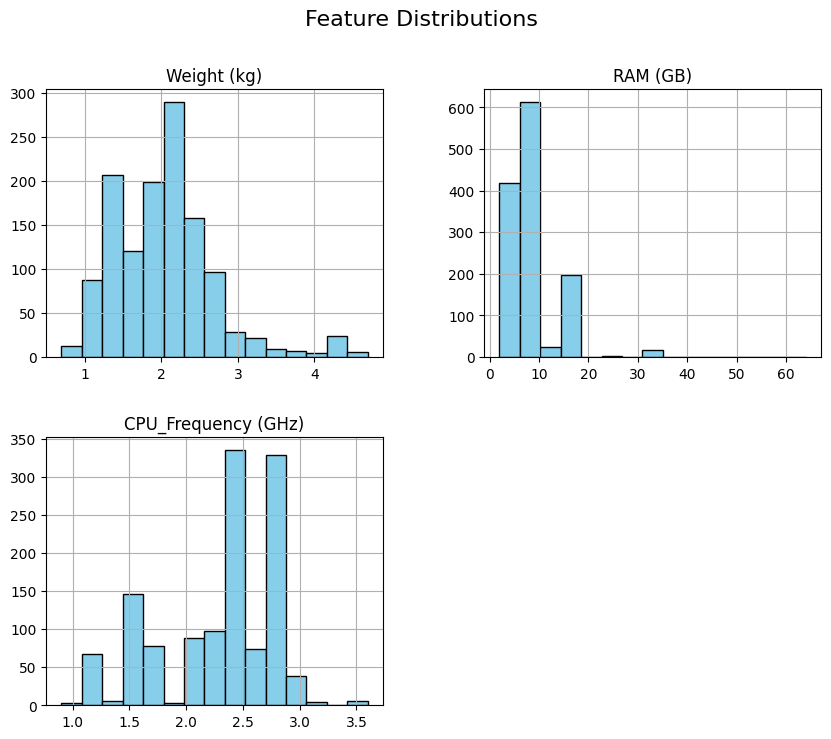

Correlation Heatmap:


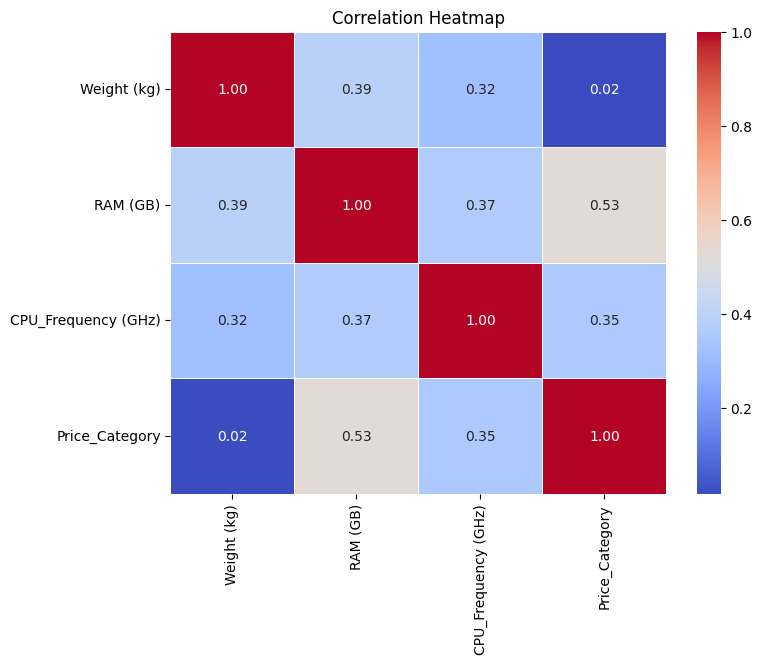

Scatter Plot:


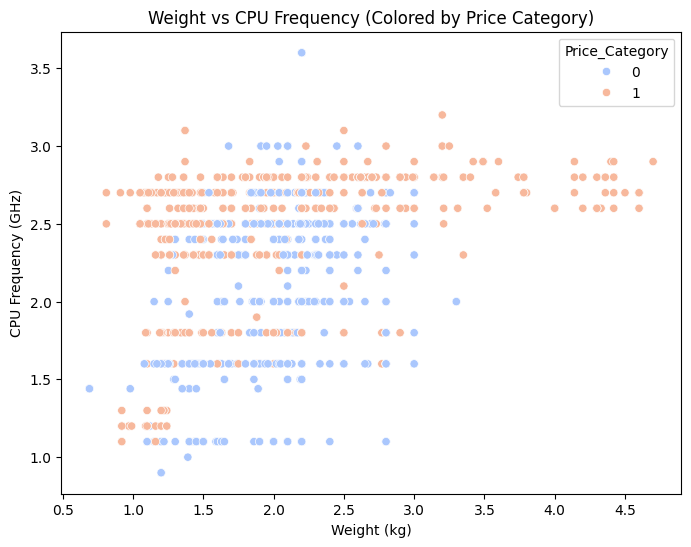

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("laptop_price.csv")

# Step 1: Convert 'Price (Euro)' to binary classification
threshold = df['Price (Euro)'].median()  # Define the threshold for classification
df['Price_Category'] = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Selected features
selected_features = ["Weight (kg)", "RAM (GB)", "CPU_Frequency (GHz)"]  # Adjust as needed

# Step 3: Pair plot
print("Pair Plot:")
sns.pairplot(df[selected_features + ["Price_Category"]], hue="Price_Category", palette="coolwarm")
plt.show()

# Step 4: Histograms
print("Histograms:")
df[selected_features].hist(bins=15, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', size=16)
plt.show()

# Step 5: Correlation Heatmap
print("Correlation Heatmap:")
corr = df[selected_features + ["Price_Category"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Scatter Plot (Weight vs CPU_Frequency, colored by Price_Category)
print("Scatter Plot:")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Weight (kg)", y="CPU_Frequency (GHz)", hue="Price_Category", palette="coolwarm")
plt.title("Weight vs CPU Frequency (Colored by Price Category)")
plt.xlabel("Weight (kg)")
plt.ylabel("CPU Frequency (GHz)")
plt.show()


In [ ]:
import pandas as pd



# Derive 'ScreenResolution' and 'Memory_Size' features if needed
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(float).prod(axis=1)  # Pixel count approximation
df['Memory_Size (GB)'] = df['Memory'].str.extract(r'(\d+)').astype(int)  # Extract memory size in GB

# Define the selected features and target
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Based on correlation
X = df[selected_features]  # Features
y = df['Price (Euro)']  # Target

# Display the first few rows of X and y
print("Selected Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Selected Features (X):
   Weight (kg)  ScreenResolution  RAM (GB)  CPU_Frequency (GHz)
0         1.37         4096000.0         8                  2.3
1         1.34         1296000.0         8                  1.8
2         1.86         2073600.0         8                  2.5
3         1.83         5184000.0        16                  2.7
4         1.37         4096000.0         8                  3.1

Target (y):
0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price (Euro), dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'laptop_price.csv'  # Replace with the correct path to your file
df = pd.read_csv(file_path)

# Step 1: Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Step 2: Handle missing values
# Assuming no missing values in key columns; fill any missing numeric data with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Step 3: Convert categorical data to numeric
# Example: Encoding the 'OpSys' column using one-hot encoding
if 'OpSys' in df.columns:
    df = pd.get_dummies(df, columns=['OpSys'], prefix='OpSys', drop_first=True)

# Step 4: Extract useful information from text columns
# Example 1: Extract screen resolution (if not already done)
if 'ScreenResolution' in df.columns:
    resolution_split = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
    df['ScreenResolution'] = resolution_split[0].astype(float) * resolution_split[1].astype(float)

# Example 2: Extract numeric memory size from 'Memory' column
if 'Memory' in df.columns:
    df['Memory_Size (GB)'] = df['Memory'].str.extract(r'(\d+)').astype(float)

# Step 5: Normalize or scale numerical columns (optional, depending on the ML model)
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_columns = ['Weight (kg)', 'ScreenResolution', 'RAM (GB)', 'CPU_Frequency (GHz)', 'Price (Euro)']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 6: Drop redundant or irrelevant columns
# Example: Dropping the original 'Memory' column after extracting numeric data
columns_to_drop = ['Memory']  # Add any other redundant columns here
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Step 7: Check the cleaned dataset
print("Cleaned DataFrame:")
print(df.head())

# Optional: Save the cleaned dataset
df.to_csv('laptop_price_cleaned.csv', index=False)


Missing Values:
 Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64
Cleaned DataFrame:
  Company      Product   TypeName  Inches  ScreenResolution CPU_Company  \
0   Apple  MacBook Pro  Ultrabook    13.3          1.376413       Intel   
1   Apple  Macbook Air  Ultrabook    13.3         -0.634604       Intel   
2      HP       250 G6   Notebook    15.6         -0.076116       Intel   
3   Apple  MacBook Pro  Ultrabook    15.4          2.157837       Intel   
4   Apple  MacBook Pro  Ultrabook    13.3          1.376413       Intel   

        CPU_Type  CPU_Frequency (GHz)  RAM (GB) GPU_Company  ... Price (Euro)  \
0        Core i5            -0.005918 -0.086

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Based on analysis
X = df[selected_features]  # Features
y = df['Price (Euro)']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the splits
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")


Training Set: 1020 samples
Testing Set: 255 samples


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Convert target variable 'Price (Euro)' to binary classification (e.g., high price vs low price)
# Define a threshold for binary classification (e.g., median price)
threshold = df['Price (Euro)'].median()
y_binary = (y > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Step 5: Train the model
log_reg.fit(X_train_scaled, y_train)

# Step 6: Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7961
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       118
           1       0.78      0.86      0.82       137

    accuracy                           0.80       255
   macro avg       0.80      0.79      0.79       255
weighted avg       0.80      0.80      0.79       255



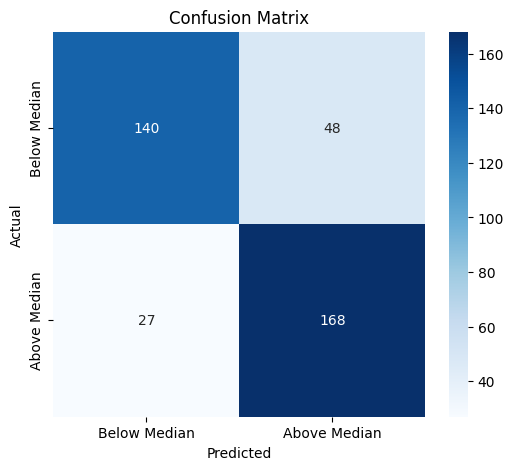

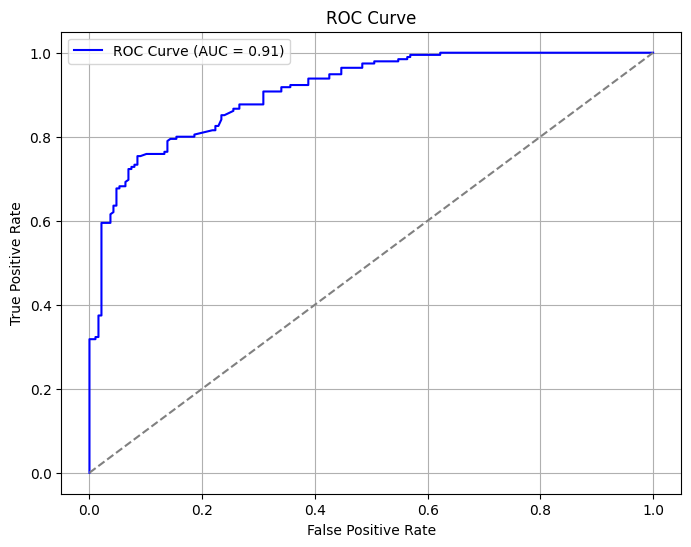

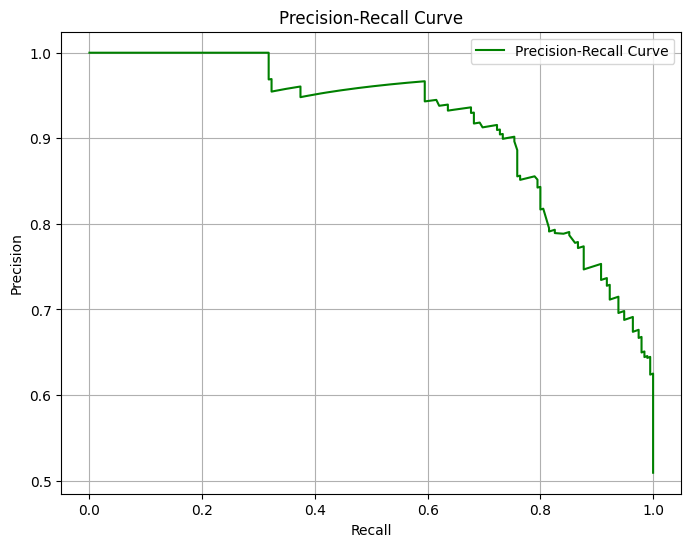

<ipython-input-6-ec32ee96fb35>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients['Importance'], y=coefficients.index, palette="coolwarm")


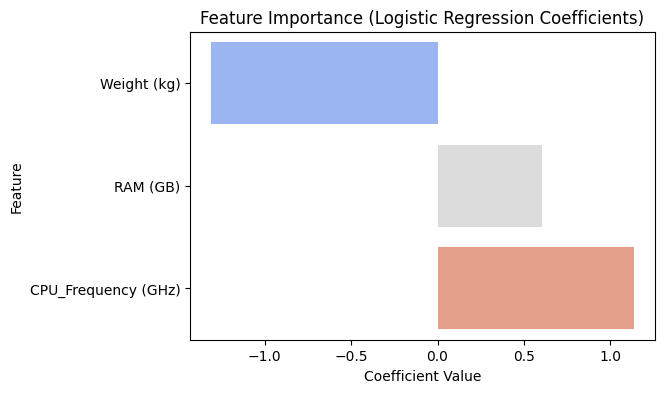

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'df' is already loaded, cleaned, and preprocessed
# Define features and target
selected_features = ["Weight (kg)", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]
y = (df['Price (Euro)'] > df['Price (Euro)'].median()).astype(int)  # Binary classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Step 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Below Median", "Above Median"],
            yticklabels=["Below Median", "Above Median"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 2: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Step 3: Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

# Step 4: Feature Importance
coefficients = pd.DataFrame(log_reg.coef_[0], index=selected_features, columns=['Importance']).sort_values(by='Importance')
plt.figure(figsize=(6, 4))
sns.barplot(x=coefficients['Importance'], y=coefficients.index, palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Convert target variable 'Price (Euro)' to binary classification (e.g., high price vs low price)
# Define a threshold for binary classification (e.g., median price)
threshold = df['Price (Euro)'].median()
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 6: Train the model
dt_classifier.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = dt_classifier.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8471
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       118
           1       0.88      0.83      0.85       137

    accuracy                           0.85       255
   macro avg       0.85      0.85      0.85       255
weighted avg       0.85      0.85      0.85       255



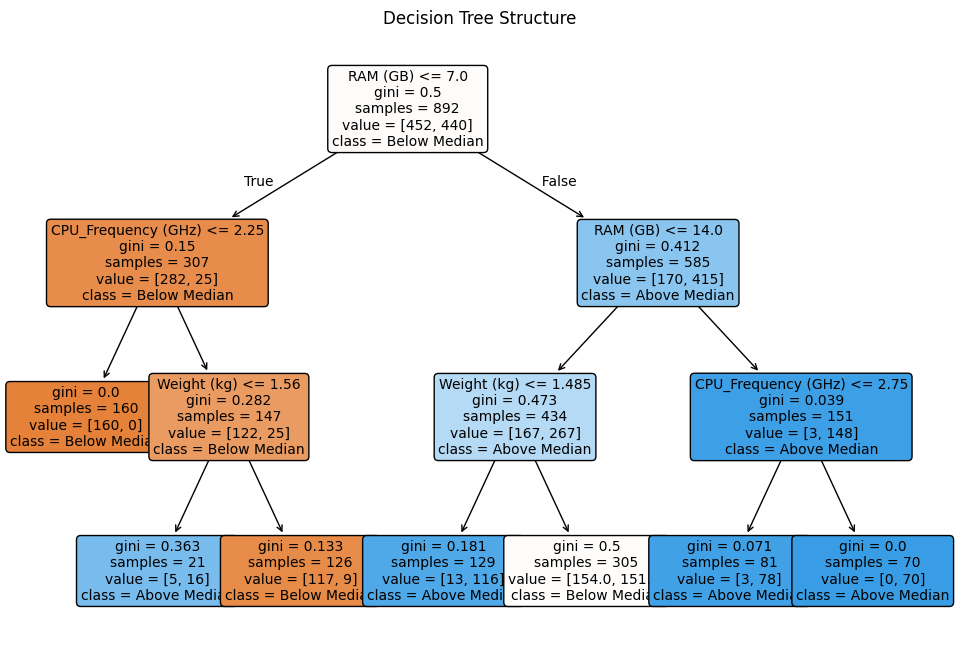

<ipython-input-7-174f91e135b3>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances.index, palette="coolwarm")


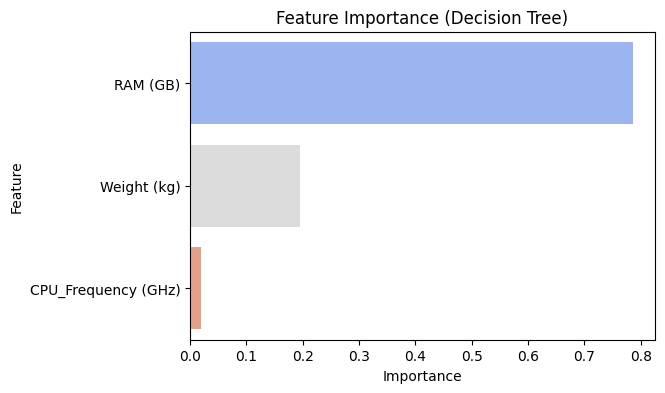

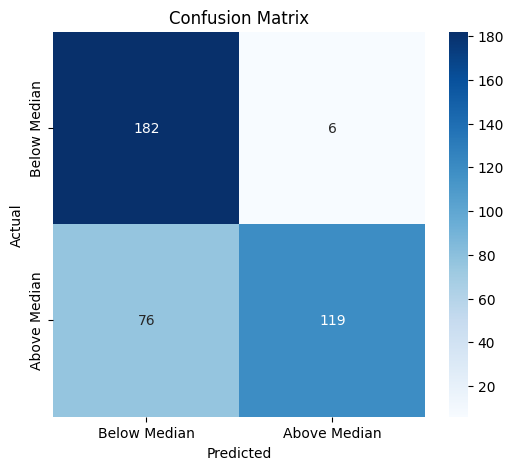

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define features and target
selected_features = ["Weight (kg)", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]
y = (df['Price (Euro)'] > df['Price (Euro)'].median()).astype(int)  # Binary classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth as needed
tree_clf.fit(X_train, y_train)

# Step 1: Decision Tree Structure Visualization
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=selected_features, class_names=["Below Median", "Above Median"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

# Step 2: Feature Importance
feature_importances = pd.DataFrame(tree_clf.feature_importances_, index=selected_features,
                                   columns=["Importance"]).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances["Importance"], y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Step 3: Confusion Matrix
y_pred = tree_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Below Median", "Above Median"],
            yticklabels=["Below Median", "Above Median"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Step 1: Convert target variable 'Price (Euro)' to binary classification (e.g., high price vs low price)
# Define a threshold for binary classification (e.g., median price)
threshold = df['Price (Euro)'].median()
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features and handle the categorical 'ScreenResolution' feature
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Convert 'ScreenResolution' (categorical) to numerical format using LabelEncoder
label_encoder = LabelEncoder()
X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 7: Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-23-69a697354206>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))


Accuracy: 0.8392
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       118
           1       0.85      0.85      0.85       137

    accuracy                           0.84       255
   macro avg       0.84      0.84      0.84       255
weighted avg       0.84      0.84      0.84       255



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Convert target variable 'Price (Euro)' to binary classification (e.g., high price vs low price)
# Define a threshold for binary classification (e.g., median price)
threshold = df['Price (Euro)'].median()
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (SVM models are sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)  # You can use 'linear', 'rbf', or 'poly'

# Step 6: Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7882
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       118
           1       0.77      0.87      0.82       137

    accuracy                           0.79       255
   macro avg       0.79      0.78      0.78       255
weighted avg       0.79      0.79      0.79       255



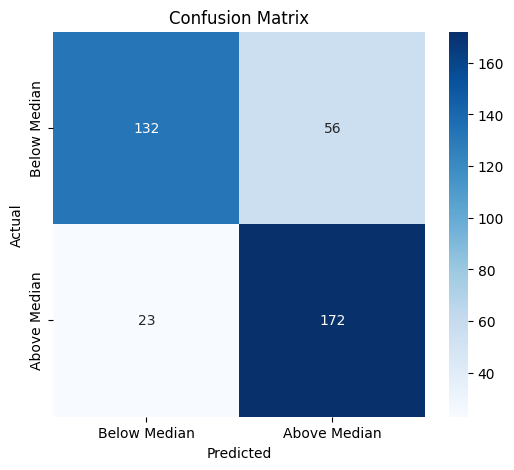

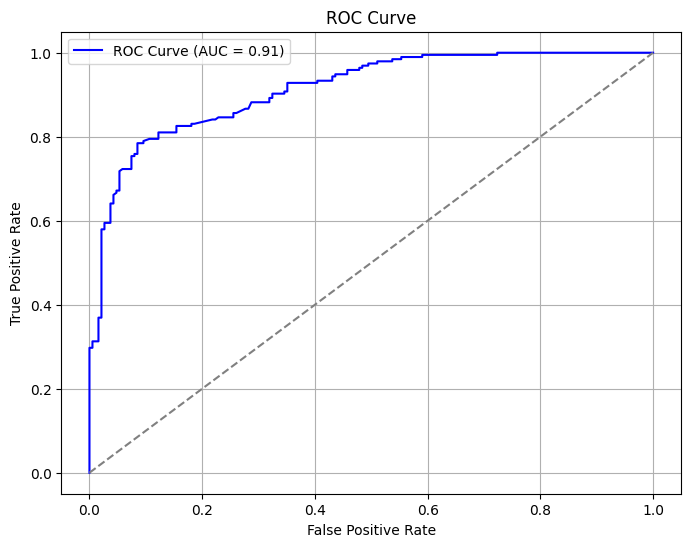

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA  # For dimensionality reduction (if necessary)

# Define features and target
selected_features = ["Weight (kg)", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]
y = (df['Price (Euro)'] > df['Price (Euro)'].median()).astype(int)  # Binary classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
svm_clf = SVC(kernel='linear', probability=True, random_state=42)  # Change kernel to 'rbf', 'poly', etc., as needed
svm_clf.fit(X_train, y_train)

# Step 1: Confusion Matrix
y_pred = svm_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Below Median", "Above Median"],
            yticklabels=["Below Median", "Above Median"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 2: Decision Boundary (if reduced to 2 features)
if len(selected_features) == 2:
    import numpy as np
    x_min, x_max = X_train[selected_features[0]].min() - 1, X_train[selected_features[0]].max() + 1
    y_min, y_max = X_train[selected_features[1]].min() - 1, X_train[selected_features[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    sns.scatterplot(x=X_train[selected_features[0]], y=X_train[selected_features[1]],
                    hue=y_train, palette="coolwarm", edgecolor="k")
    plt.title("Decision Boundary (SVM)")
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

# Step 3: ROC Curve
y_pred_proba = svm_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


Inertia: 2891.4306


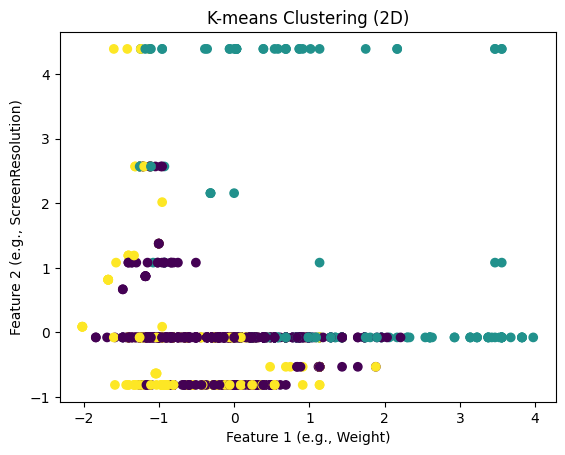

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select the features for clustering
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features to use for clustering
X = df[selected_features]

# Step 2: Standardize the features (K-means is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means clustering (let's assume 3 clusters, you can tune this)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Step 4: Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Step 5: Evaluate clustering - inertia (sum of squared distances of samples to their closest cluster center)
print(f"Inertia: {kmeans.inertia_:.4f}")

# Step 6: Optional - Visualize the clusters (2D visualization for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering (2D)')
plt.xlabel('Feature 1 (e.g., Weight)')
plt.ylabel('Feature 2 (e.g., ScreenResolution)')
plt.show()


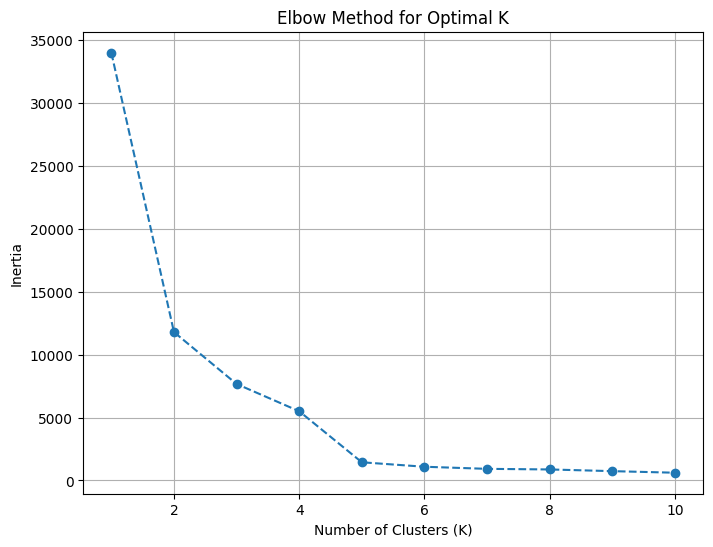

Silhouette Score: 0.71


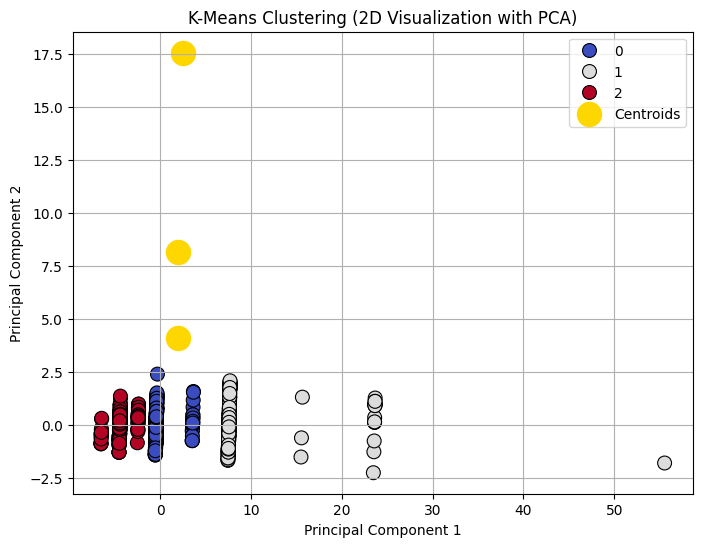

<ipython-input-11-f60b85c4fe27>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df, palette="coolwarm")


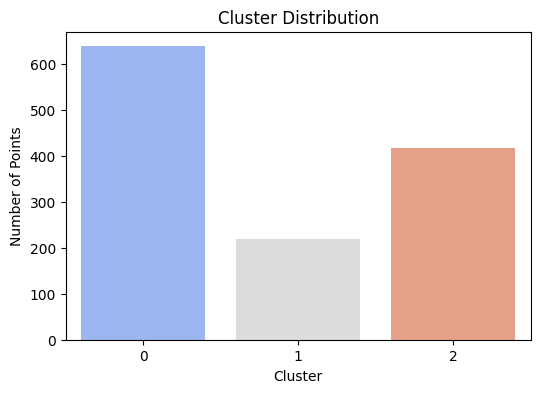

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define features for clustering
selected_features = ["Weight (kg)", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]

# Step 1: Elbow Method for Optimal Number of Clusters
inertia = []
k_values = range(1, 11)  # Try 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Step 2: K-Means Clustering
optimal_k = 3  # Based on elbow method (adjust as needed)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
df["Cluster"] = clusters  # Add cluster labels to the dataset

# Step 3: Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

# Step 4: PCA for Visualization (Reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="coolwarm", s=100, edgecolor="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='gold', label='Centroids')
plt.title("K-Means Clustering (2D Visualization with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

# Optional: Distribution of Clusters
plt.figure(figsize=(6, 4))
sns.countplot(x="Cluster", data=df, palette="coolwarm")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.show()


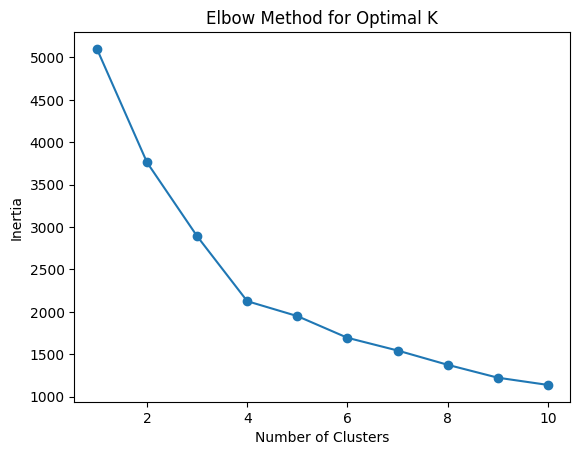

In [ ]:
inertia_values = []
for k in range(1, 11):  # Testing clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Convert 'Price (Euro)' to binary classification (e.g., high price vs low price)
threshold = df['Price (Euro)'].median()
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features for KNN
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (KNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors (k)

# Step 6: Train the KNN model
knn_classifier.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8706
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       118
           1       0.88      0.88      0.88       137

    accuracy                           0.87       255
   macro avg       0.87      0.87      0.87       255
weighted avg       0.87      0.87      0.87       255



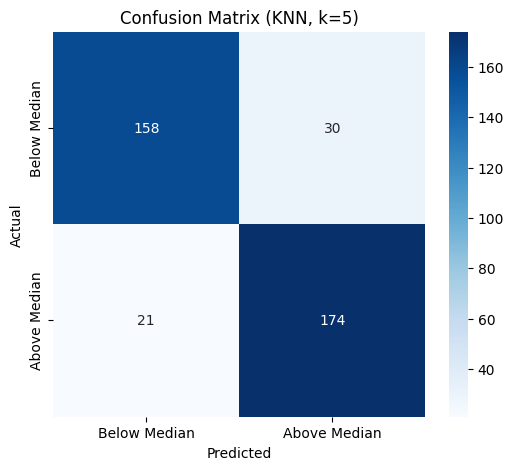

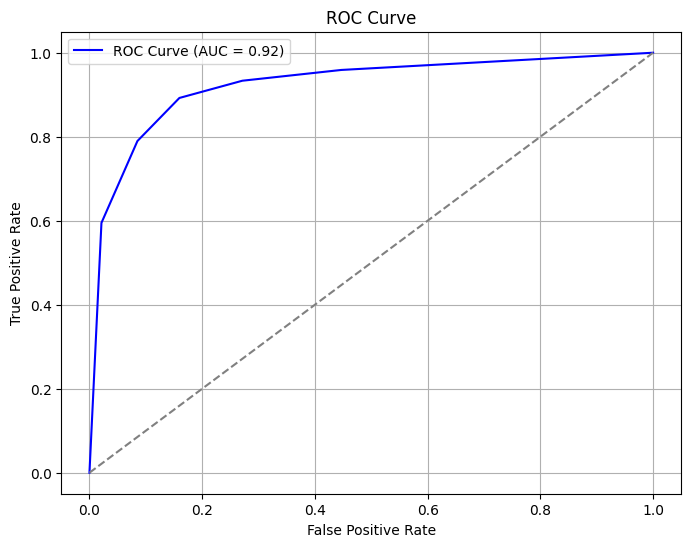

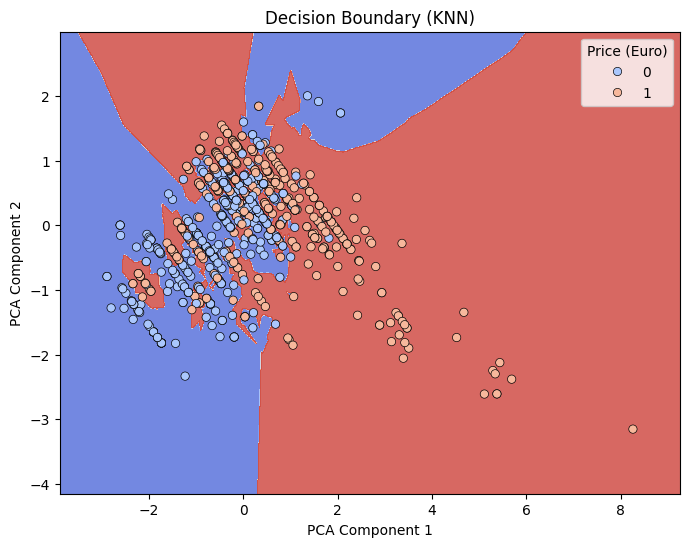

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define features and target
selected_features = ["Weight (kg)", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]
y = (df['Price (Euro)'] > df['Price (Euro)'].median()).astype(int)  # Binary classification: Above/Below Median Price

# Step 2: Standardize features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Train KNN model
k = 5  # You can tune this parameter
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train, y_train)

# Step 5: Confusion Matrix Visualization
y_pred = knn_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Below Median", "Above Median"],
            yticklabels=["Below Median", "Above Median"])
plt.title(f"Confusion Matrix (KNN, k={k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: ROC Curve
y_pred_proba = knn_clf.predict_proba(X_test)[:, 1]  # Probability for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Step 7: Decision Boundary (if reduced to 2D)
if len(selected_features) > 2:  # Reduce features to 2D for visualization
    pca = PCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
    knn_clf.fit(X_train_2d, y_train)
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))  # Fixed closing parenthesis here
    Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=y_train, palette="coolwarm", edgecolor="k")
    plt.title("Decision Boundary (KNN)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Convert 'Price (Euro)' to binary classification (e.g., high price vs low price)
threshold = df['Price (Euro)'].median()
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features for LDA
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (LDA is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize the LDA model
lda_classifier = LinearDiscriminantAnalysis()

# Step 6: Train the LDA model
lda_classifier.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = lda_classifier.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7765
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       118
           1       0.82      0.74      0.78       137

    accuracy                           0.78       255
   macro avg       0.78      0.78      0.78       255
weighted avg       0.78      0.78      0.78       255



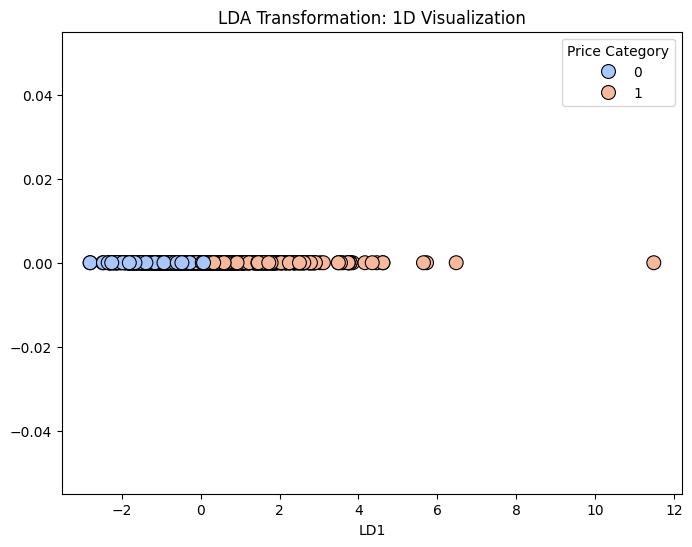

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Define features and target
selected_features = ["Weight (kg)", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]
y = (df['Price (Euro)'] > df['Price (Euro)'].median()).astype(int)  # Binary classification: Above/Below Median Price

# Step 2: Standardize features for LDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply LDA with n_components=1
lda = LinearDiscriminantAnalysis(n_components=1)  # Reduce to 1D since we have only 2 classes
X_lda = lda.fit_transform(X_scaled, y)

# Step 4: Split data into training and testing sets (not necessary for visualization but common practice)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# Step 5: Visualization of LDA transformation in 1D (since only 1 component is chosen)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette='coolwarm', edgecolor='k', s=100)
plt.title("LDA Transformation: 1D Visualization")
plt.xlabel('LD1')  # First Linear Discriminant Component
plt.ylabel('')
plt.legend(title="Price Category", loc='best')
plt.show()

# Optionally, visualize decision boundaries for LDA if needed (for 1D it may not be meaningful)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Step 1: Convert 'Price (Euro)' to binary classification (e.g., high price vs low price)
threshold = df['Price (Euro)'].median()  # Define the threshold for classification
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features for AdaBoost
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (AdaBoost works better when features are scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize the AdaBoost model (using default decision stump base estimator)
ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Step 6: Train the AdaBoost model
ada_boost_classifier.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = ada_boost_classifier.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8510
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       118
           1       0.87      0.85      0.86       137

    accuracy                           0.85       255
   macro avg       0.85      0.85      0.85       255
weighted avg       0.85      0.85      0.85       255



<ipython-input-28-0e8ca5f63704>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8549
Accuracy of AdaBoost Classifier:  0.8549019607843137


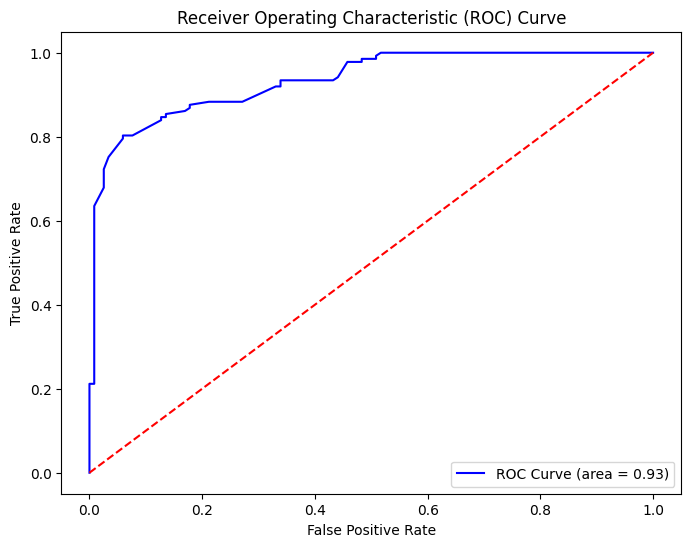

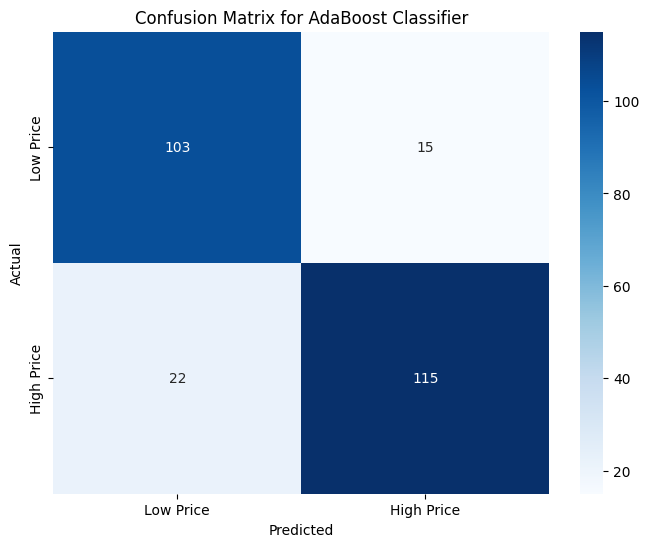

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

# Step 1: Convert target variable 'Price (Euro)' to binary classification (e.g., high price vs low price)
threshold = df['Price (Euro)'].median()  # Define a threshold for binary classification (e.g., median price)
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features and handle the categorical 'ScreenResolution' feature
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Convert 'ScreenResolution' (categorical) to numerical format using LabelEncoder
label_encoder = LabelEncoder()
X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features (optional but recommended for AdaBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize AdaBoost Classifier (no base estimator specified)
ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Step 7: Train the model
ada_boost_classifier.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test set
y_pred = ada_boost_classifier.predict(X_test_scaled)
y_pred_prob = ada_boost_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Visualizations

## 1. Accuracy of AdaBoost Classifier
print("Accuracy of AdaBoost Classifier: ", accuracy)

## 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (Random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Convert 'Price (Euro)' to binary classification (e.g., high price vs low price)
threshold = df['Price (Euro)'].median()  # Define the threshold for classification
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features for the model
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (though Gradient Boosting is less sensitive to this)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize the Gradient Boosting model
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 6: Train the Gradient Boosting model
gradient_boosting_classifier.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8588
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       118
           1       0.89      0.84      0.86       137

    accuracy                           0.86       255
   macro avg       0.86      0.86      0.86       255
weighted avg       0.86      0.86      0.86       255



<ipython-input-25-9440e78996d2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))


Accuracy: 0.8588
Accuracy of Gradient Boosting Classifier:  0.8588235294117647


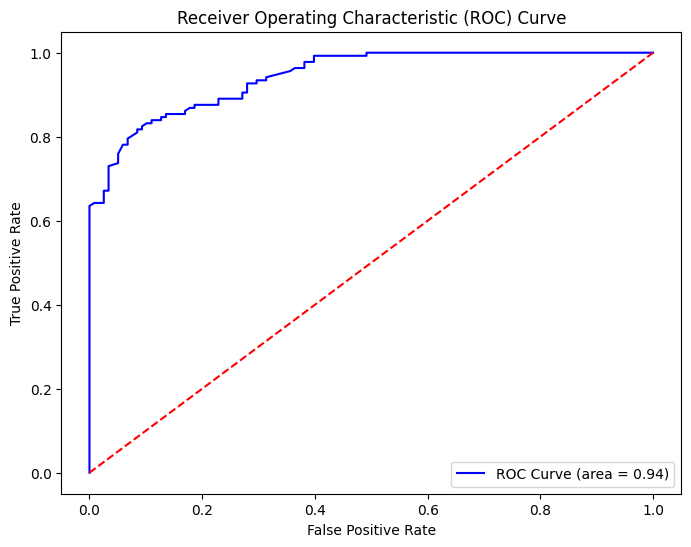

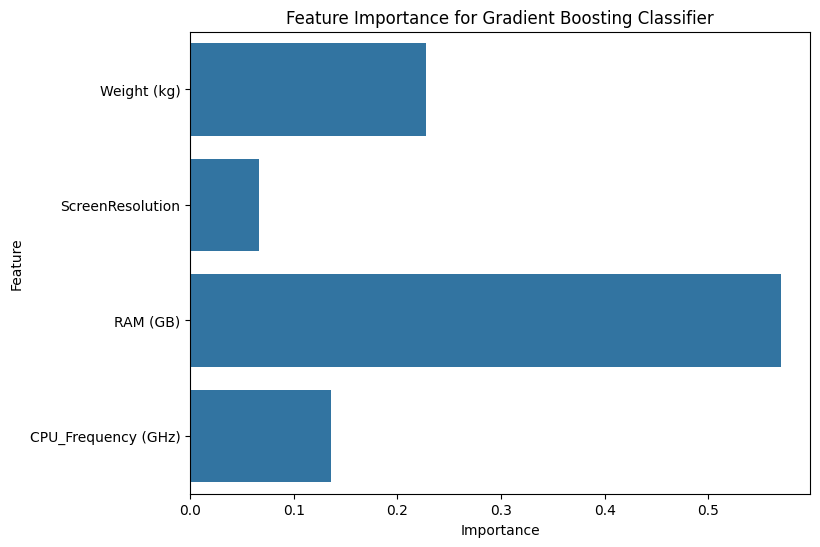

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Step 1: Convert target variable 'Price (Euro)' to binary classification (e.g., high price vs low price)
threshold = df['Price (Euro)'].median()  # Define a threshold for binary classification (e.g., median price)
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features and handle the categorical 'ScreenResolution' feature
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Convert 'ScreenResolution' (categorical) to numerical format using LabelEncoder
label_encoder = LabelEncoder()
X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Step 7: Train the model
gb_classifier.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test set
y_pred = gb_classifier.predict(X_test_scaled)
y_pred_prob = gb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Visualizations

## 1. Accuracy of Gradient Boosting Classifier
print("Accuracy of Gradient Boosting Classifier: ", accuracy)

## 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (Random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 3. Feature Importance Plot
importances = gb_classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Convert 'Price (Euro)' to binary classification (e.g., high price vs low price)
threshold = df['Price (Euro)'].median()  # Define the threshold for classification
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features for the model
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (Gaussian Naive Bayes assumes normally distributed features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize the Naive Bayes model
naive_bayes_classifier = GaussianNB()

# Step 6: Train the Naive Bayes model
naive_bayes_classifier.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7098
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.97      0.75       118
           1       0.94      0.49      0.64       137

    accuracy                           0.71       255
   macro avg       0.78      0.73      0.70       255
weighted avg       0.79      0.71      0.70       255



<ipython-input-26-2df5ca840585>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))


Accuracy: 0.7529
Accuracy of Naive Bayes Classifier:  0.7529411764705882


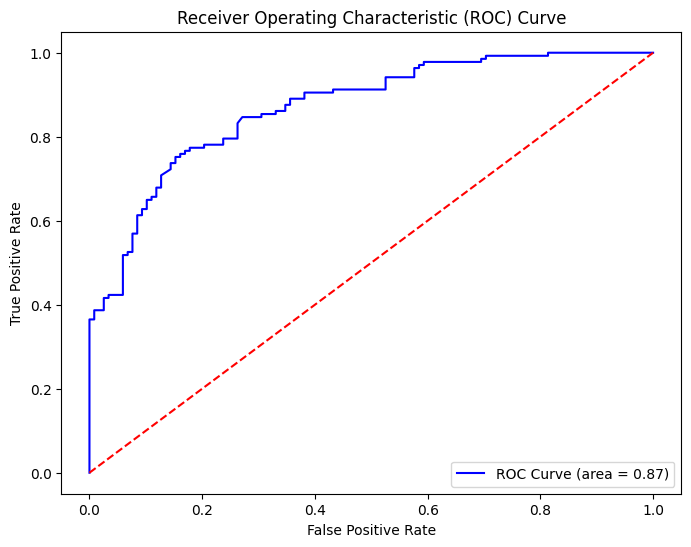

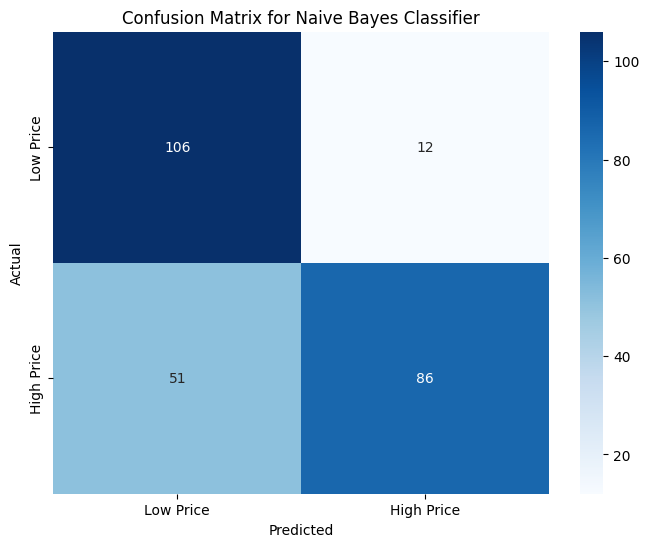

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Step 1: Convert target variable 'Price (Euro)' to binary classification (e.g., high price vs low price)
threshold = df['Price (Euro)'].median()  # Define a threshold for binary classification (e.g., median price)
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features and handle the categorical 'ScreenResolution' feature
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Step 3: Convert 'ScreenResolution' (categorical) to numerical format using LabelEncoder
label_encoder = LabelEncoder()
X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features (optional but recommended for Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize Naive Bayes Classifier
nb_classifier = GaussianNB()

# Step 7: Train the model
nb_classifier.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test set
y_pred = nb_classifier.predict(X_test_scaled)
y_pred_prob = nb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Visualizations

## 1. Accuracy of Naive Bayes Classifier
print("Accuracy of Naive Bayes Classifier: ", accuracy)

## 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (Random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Step 1: Define features and target
selected_features = ["Weight (kg)", "RAM (GB)", "CPU_Frequency (GHz)"]  # Example features
X = df[selected_features]
y = (df['Price (Euro)'] > df['Price (Euro)'].median()).astype(int)  # Binary classification: Above/Below Median Price

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

# Step 5: Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

# Step 6: Display results
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='F1 Score', ascending=False))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Accuracy  F1 Score  Precision    Recall
AdaBoost             0.877285  0.877922   0.889474  0.866667
KNN                  0.866841  0.872180   0.852941  0.892308
Random Forest        0.861619  0.862338   0.873684  0.851282
SVM                  0.859008  0.862245   0.857868  0.866667
Gradient Boosting    0.856397  0.857143   0.868421  0.846154
Decision Tree        0.838120  0.836842   0.859459  0.815385
Logistic Regression  0.801567  0.814634   0.776744  0.856410
LDA                  0.798956  0.798956   0.813830  0.784615
Naive Bayes          0.767624  0.722741   0.920635  0.594872


<ipython-input-29-450d9891bf53>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
<ipython-input-29-450d9891bf53>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=model_comparison, palette='viridis')


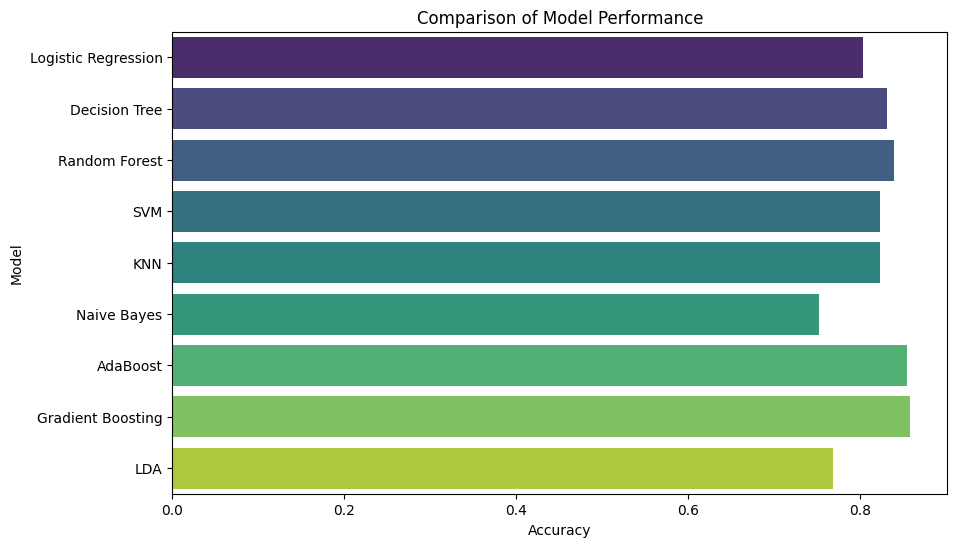

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Convert target variable 'Price (Euro)' to binary classification
threshold = df['Price (Euro)'].median()  # Define a threshold for binary classification
y_binary = (df['Price (Euro)'] > threshold).astype(int)  # 1 if price > threshold, 0 if price <= threshold

# Step 2: Select features and handle the categorical 'ScreenResolution' feature
selected_features = ["Weight (kg)", "ScreenResolution", "RAM (GB)", "CPU_Frequency (GHz)"]  # Features
X = df[selected_features]  # Features
y = y_binary  # Target (binary classification)

# Convert 'ScreenResolution' (categorical) to numerical format using LabelEncoder
label_encoder = LabelEncoder()
X['ScreenResolution'] = label_encoder.fit_transform(X['ScreenResolution'].astype(str))

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize all classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
}

# Step 6: Train each model, make predictions, and store accuracy scores
accuracy_scores = []
model_names = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    model_names.append(model_name)

# Step 7: Create a DataFrame for visualization
model_comparison = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

# Step 8: Visualize the model comparison (Bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_comparison, palette='viridis')
plt.title('Comparison of Model Performance')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()
